In [1]:
# needed on mac
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
METRICS_COLS = ['timestamp', 'utilization.gpu [%]']

In [3]:
def convert_to_sec(hour_min_sec):
    result_format = hour_min_sec
    [hours, minutes, seconds] = hour_min_sec.split(":")
    #print hours, minutes, seconds
    result_format = float(hours) * 3600. + float(minutes) * 60. + float(seconds)
    #print result_format
    return result_format

### read 0.5 second trace

In [4]:
file_csv='monitor_log_0.5s'

df_trace = pd.read_csv(file_csv,  engine='python')

df_trace[:15]

,timestamp,utilization.gpu [%]
0,2018/02/28 13:56:10.630,0 %
1,2018/02/28 13:56:10.631,0 %
2,2018/02/28 13:56:10.631,0 %
3,2018/02/28 13:56:10.632,0 %
4,2018/02/28 13:56:10.633,0 %
5,2018/02/28 13:56:10.633,0 %
6,2018/02/28 13:56:10.634,0 %
7,2018/02/28 13:56:10.634,0 %
8,2018/02/28 13:56:10.635,0 %
9,2018/02/28 13:56:10.636,0 %


In [5]:
count_gpus = 12

sampling_records = int(df_trace.shape[0] / 12.)
print sampling_records

321


In [6]:
print('monitoring records array : {} x {}'.format(count_gpus, sampling_records))

monitoring records array : 12 x 321


In [7]:
util_array = np.zeros((count_gpus, sampling_records)) # each column is each time step

In [8]:
#
# monitor every 0.5 second
#

for index, row in df_trace.iterrows():
    #print index, row[0], row[1]
    gpu_util = float(row[1][:-2]) * 0.01 # process the utilization
    
    col_id =  int(index) / count_gpus
    row_id =  int(index) % count_gpus
    
    util_array[row_id, col_id] = gpu_util

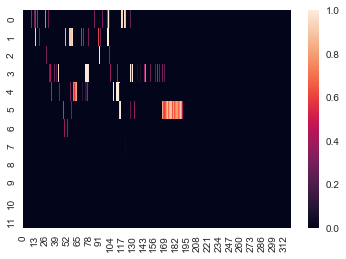

In [9]:
sns.set()

ax = sns.heatmap(util_array)

#fig = ax.get_figure()
#fig.savefig("test.png")